In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set_style('whitegrid')
from tqdm import tqdm_notebook

In [37]:
class NetworkBaulking:
    """
    A class to hold the queueing network object
    """

    def __init__(self, n1, mu1, r11, L1):
        """
        Initialises the Network object
        """
        self.n1 = n1
        self.mu1 = mu1
        self.r11 = r11
        self.L1 = L1
        self.State_Space = [(i) for i in range(self.n1+2)] + [-1]
        self.write_transition_matrix()
        self.discretise_transition_matrix()

    def find_transition_rates(self, state1, state2):
        """
        Finds the transition rates for given state transition
        """
        if state1 == -1:
            return 0
        if state2 == -1:
            if state1 == self.n1 + 1:
                return self.r11*self.mu1
            else:
                return 0
        else:
            delta = (state2-state1)
            if delta == 1:
                if state1<self.n1+1:
                    return self.L1*(1 - (state1/(self.n1+1)))
                return 0
            if delta == -1:
                return (1-self.r11)*self.mu1
        return 0

    def write_transition_matrix(self):
        """
        Writes the transition matrix for the markov chain
        """
        self.transition_matrix = [[self.find_transition_rates(s1, s2) for s2 in self.State_Space] for s1 in self.State_Space]
        for i in range(len(self.transition_matrix)):
            a = sum(self.transition_matrix[i])
            self.transition_matrix[i][i] = -a
            self.transition_matrix = np.array(self.transition_matrix)

    def discretise_transition_matrix(self):
        """
        Disctetises the transition matrix
        """
        self.time_step = 1 / max([abs(self.transition_matrix[i][i]) for i in range(len(self.transition_matrix))])
        self.discrete_transition_matrix = self.transition_matrix*self.time_step + np.identity(len(self.transition_matrix))

    def find_mean_time_to_absorbtion(self):
        """
        Finds the mean time to absorbtion
        """
        T = self.discrete_transition_matrix[:-1, :-1]
        S = np.linalg.inv(np.identity(len(T)) - T)
        steps2absorb = [sum([S[i,j] for j in range(len(S))]) for i in range(len(S))]
        time2absorb = [s*self.time_step for s in steps2absorb]
        self.mean_steps_to_absorbtion = {str(self.State_Space[i]): steps2absorb[i] for i in range(len(steps2absorb))}
        self.mean_time_to_absorbtion = {str(self.State_Space[i]): float(time2absorb[i]) for i in range(len(time2absorb))}

In [39]:
class Network:
    """
    A class to hold the queueing network object
    """

    def __init__(self, n1, mu1, r11, L1):
        """
        Initialises the Network object
        """
        self.n1 = n1
        self.mu1 = mu1
        self.r11 = r11
        self.L1 = L1
        self.State_Space = [(i) for i in range(self.n1+2)] + [-1]
        self.write_transition_matrix()
        self.discretise_transition_matrix()

    def find_transition_rates(self, state1, state2):
        """
        Finds the transition rates for given state transition
        """
        if state1 == -1:
            return 0
        if state2 == -1:
            if state1 == self.n1 + 1:
                return self.r11*self.mu1
            else:
                return 0
        else:
            delta = (state2-state1)
            if delta == 1:
                if state1<self.n1+1:
                    return self.L1
                return 0
            if delta == -1:
                return (1-self.r11)*self.mu1
        return 0

    def write_transition_matrix(self):
        """
        Writes the transition matrix for the markov chain
        """
        self.transition_matrix = [[self.find_transition_rates(s1, s2) for s2 in self.State_Space] for s1 in self.State_Space]
        for i in range(len(self.transition_matrix)):
            a = sum(self.transition_matrix[i])
            self.transition_matrix[i][i] = -a
            self.transition_matrix = np.array(self.transition_matrix)

    def discretise_transition_matrix(self):
        """
        Disctetises the transition matrix
        """
        self.time_step = 1 / max([abs(self.transition_matrix[i][i]) for i in range(len(self.transition_matrix))])
        self.discrete_transition_matrix = self.transition_matrix*self.time_step + np.identity(len(self.transition_matrix))

    def find_mean_time_to_absorbtion(self):
        """
        Finds the mean time to absorbtion
        """
        T = self.discrete_transition_matrix[:-1, :-1]
        S = np.linalg.inv(np.identity(len(T)) - T)
        steps2absorb = [sum([S[i,j] for j in range(len(S))]) for i in range(len(S))]
        time2absorb = [s*self.time_step for s in steps2absorb]
        self.mean_steps_to_absorbtion = {str(self.State_Space[i]): steps2absorb[i] for i in range(len(steps2absorb))}
        self.mean_time_to_absorbtion = {str(self.State_Space[i]): float(time2absorb[i]) for i in range(len(time2absorb))}

In [40]:
def time_to_deadlock(Lambda, mu, n, r11):
    N = Network(n, mu, r11, Lambda)
    N.find_mean_time_to_absorbtion()
    return N.mean_time_to_absorbtion['0']

def time_to_deadlock_baulk(Lambda, mu, n, r11):
    N = NetworkBaulking(n, mu, r11, Lambda)
    N.find_mean_time_to_absorbtion()
    return N.mean_time_to_absorbtion['0']

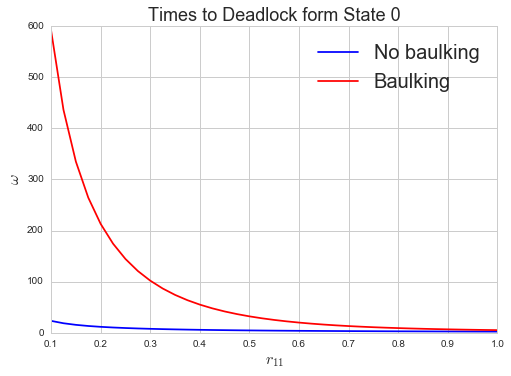

In [53]:
L = 3.0
m = 3.0
n = 5
r11 = 0.6
params_bottom = [i for i in np.linspace(0.1, 1.0, 37)]
params_leg = [0.2, 0.4, 0.6, 0.8, 1.0]
times = [time_to_deadlock(L, m, n, r11) for r11 in params_bottom]
times_baulk = [time_to_deadlock_baulk(L, m, n, r11) for r11 in params_bottom]


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(params_bottom, times, c='blue', label="No baulking")
plt.plot(params_bottom, times_baulk, c='red', label="Baulking")
plt.legend(loc=0, fontsize=20)
plt.xlabel(r'$r_{11}$', fontsize=16)
plt.ylabel(r'$\omega$', fontsize=16)
plt.title('Times to Deadlock form State 0', fontsize=18)
plt.savefig("baulk1_varyr11.pdf")

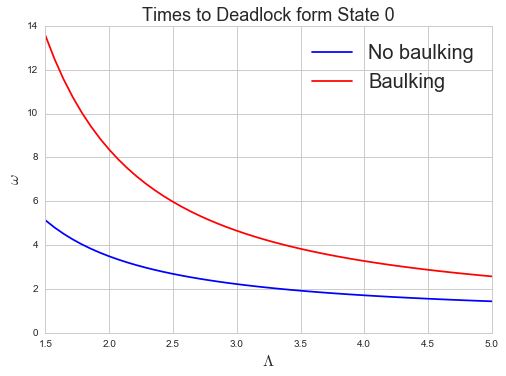

In [54]:
L = 3.0
m = 3.0
n = 2
r11 = 0.6
params_bottom = [i for i in np.linspace(1.5, 5, 50)]
params_leg = [0.2, 0.4, 0.6, 0.8, 1.0]
times = [time_to_deadlock(L, m, n, r11) for L in params_bottom]
times_baulk = [time_to_deadlock_baulk(L, m, n, r11) for L in params_bottom]


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(params_bottom, times, c='blue', label="No baulking")
plt.plot(params_bottom, times_baulk, c='red', label="Baulking")
plt.legend(loc=0, fontsize=20)
plt.xlabel(r'$\Lambda$', fontsize=16)
plt.ylabel(r'$\omega$', fontsize=16)
plt.title('Times to Deadlock form State 0', fontsize=18)
plt.savefig("baulk1_varyL.pdf")

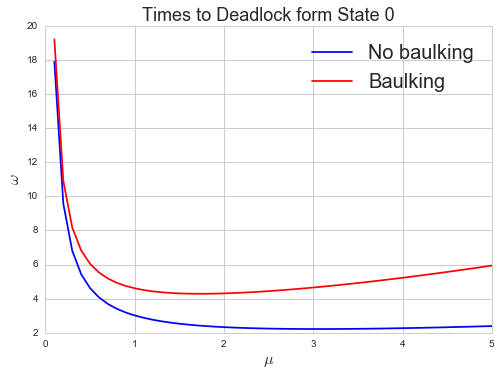

In [55]:
L = 3.0
m = 3.0
n = 2
r11 = 0.6
params_bottom = [i for i in np.linspace(0.1, 5, 50)]
params_leg = [0.2, 0.4, 0.6, 0.8, 1.0]
times = [time_to_deadlock(L, m, n, r11) for m in params_bottom]
times_baulk = [time_to_deadlock_baulk(L, m, n, r11) for m in params_bottom]


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(params_bottom, times, c='blue', label="No baulking")
plt.plot(params_bottom, times_baulk, c='red', label="Baulking")
plt.legend(loc=0, fontsize=20)
plt.xlabel(r'$\mu$', fontsize=16)
plt.ylabel(r'$\omega$', fontsize=16)
plt.title('Times to Deadlock form State 0', fontsize=18)
plt.savefig("baulk1_varymu.pdf")

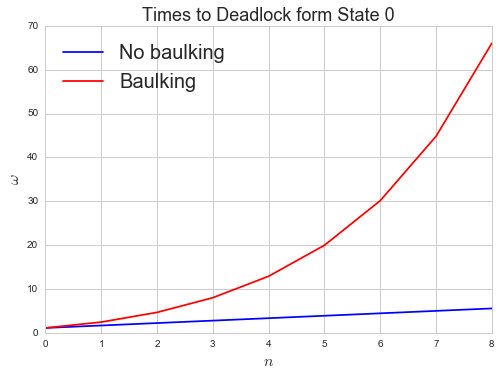

In [56]:
L = 3.0
m = 3.0
n = 2
r11 = 0.6
params_bottom = [0, 1, 2, 3, 4, 5, 6, 7, 8]
params_leg = [0.2, 0.4, 0.6, 0.8, 1.0]
times = [time_to_deadlock(L, m, n, r11) for n in params_bottom]
times_baulk = [time_to_deadlock_baulk(L, m, n, r11) for n in params_bottom]


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(params_bottom, times, c='blue', label="No baulking")
plt.plot(params_bottom, times_baulk, c='red', label="Baulking")
plt.legend(loc=0, fontsize=20)
plt.xlabel(r'$n$', fontsize=16)
plt.ylabel(r'$\omega$', fontsize=16)
plt.title('Times to Deadlock form State 0', fontsize=18)
plt.savefig("baulk1_varyn.pdf")